In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
cov_matrix = np.array([
    [0.000189, 0.000103, 0.000102, 0.00037,  8.1e-05,  3.7e-05],
    [0.000103, 0.000377, 0.00046,  0.000146, 0.000342, 0.000225],
    [0.000102, 0.00046,  0.000612, 0.000131, 0.000409, 0.000358],
    [0.00037,  0.000146, 0.000131, 0.000808, 0.00016,  8.7e-05],
    [8.1e-05,  0.000342, 0.000409, 0.00016,  0.000425, 0.000194],
    [3.7e-05,  0.000225, 0.000358, 8.7e-05,  0.000194, 0.000407]
])

Lambda = np.array([0.0407, 0.0464, 0.0705, 0.0994, 0.0857, 0.125])

# Заданное значение λ
target_lambda = 0.003476

internal_indices = [0, 4, 5]  # x4, x5, x6 (ненулевые веса)
external_indices =  [1, 2,3]  # x1, x2, x3 (нулевые веса)

# Формируем подматрицы для внутренних переменных
cov_II = cov_matrix[np.ix_(internal_indices, internal_indices)]
Lambda_I = Lambda[internal_indices]
e = np.ones(len(internal_indices))

# Расширенная матрица системы
A = np.block([
    [2*cov_II, -e.reshape(-1, 1)],
    [e, 0]
])

# Векторы правой части
b0 = np.zeros(len(internal_indices) + 1)
b0[-1] = 1
b1 = np.hstack([Lambda_I, 0])

# Решаем системы
x0 = np.linalg.solve(A, b0)
x1 = np.linalg.solve(A, b1)

beta = x0[:-1]
u0 = x0[-1]
alpha = x1[:-1]
u1 = x1[-1]

weights = beta + alpha * target_lambda

# Создаем массив весов для всех переменных
all_weights = np.zeros(6)
for i, idx in enumerate(internal_indices):
    all_weights[idx] = weights[i]

print(f"Эффективный портфель для λ = {target_lambda}:")
for i in range(6):
    print(f"x{i+1} = {all_weights[i]:.6f}")

# Расчет ожидаемой доходности и риска
expected_return = np.dot(all_weights, Lambda)
variance = np.dot(all_weights, np.dot(cov_matrix, all_weights))
risk = np.sqrt(variance)

print(f"Ожидаемая доходность: {expected_return:.6f}")
print(f"Риск (σ): {risk:.6f}")

Эффективный портфель для λ = 0.003476:
x1 = 0.374375
x2 = 0.000000
x3 = 0.000000
x4 = 0.000000
x5 = 0.109194
x6 = 0.516431
Ожидаемая доходность: 0.089149
Риск (σ): 0.013525


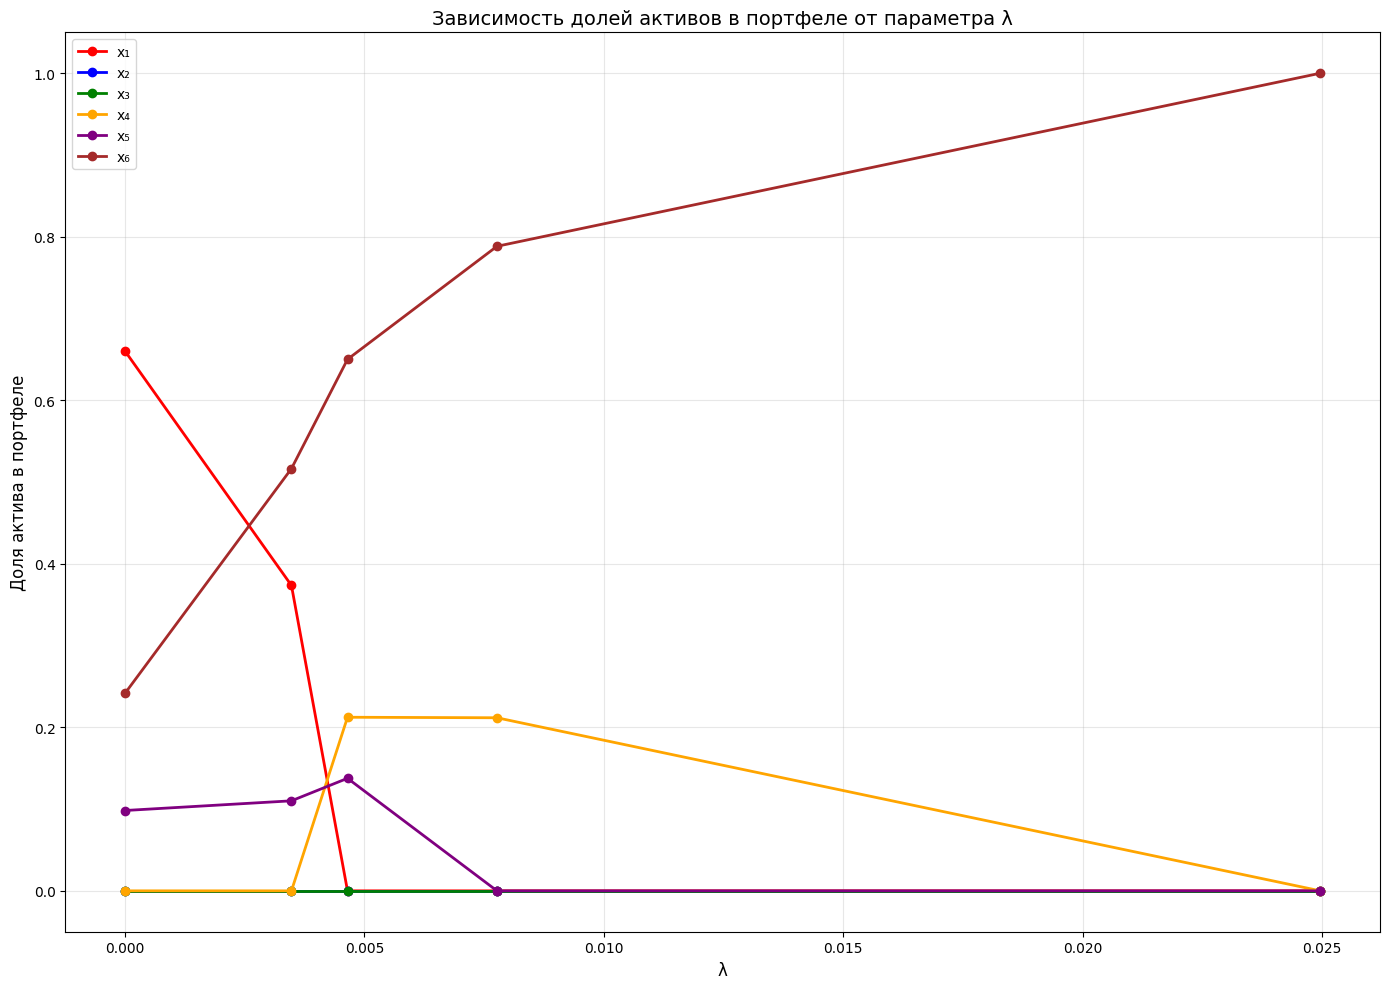

In [ ]:
lambdas = np.array([0.000000, 0.003476, 0.004647, 0.007769, 0.024965])
portfolio_weights = np.array([
    [0.660125, 0.000000, 0.000000, 0.000000, 0.098259, 0.241616],
    [0.373510, 0.000000, 0.000000, 0.000000, 0.110105, 0.516385],
    [0.000000, 0.000000, 0.000000, 0.212319, 0.137631, 0.650049],
    [0.000000, 0.000000, 0.000000, 0.211684, 0.000000, 0.788316],
    [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000]
])

plt.figure(figsize=(14, 10))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
labels = ['x₁', 'x₂', 'x₃', 'x₄', 'x₅', 'x₆']

for i in range(6):
    plt.plot(lambdas, portfolio_weights[:, i], 
             marker='o', linewidth=2, color=colors[i], label=labels[i])

plt.xlabel('λ', fontsize=12)
plt.ylabel('Доля актива в портфеле', fontsize=12)
plt.title('Зависимость долей активов в портфеле от параметра λ', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

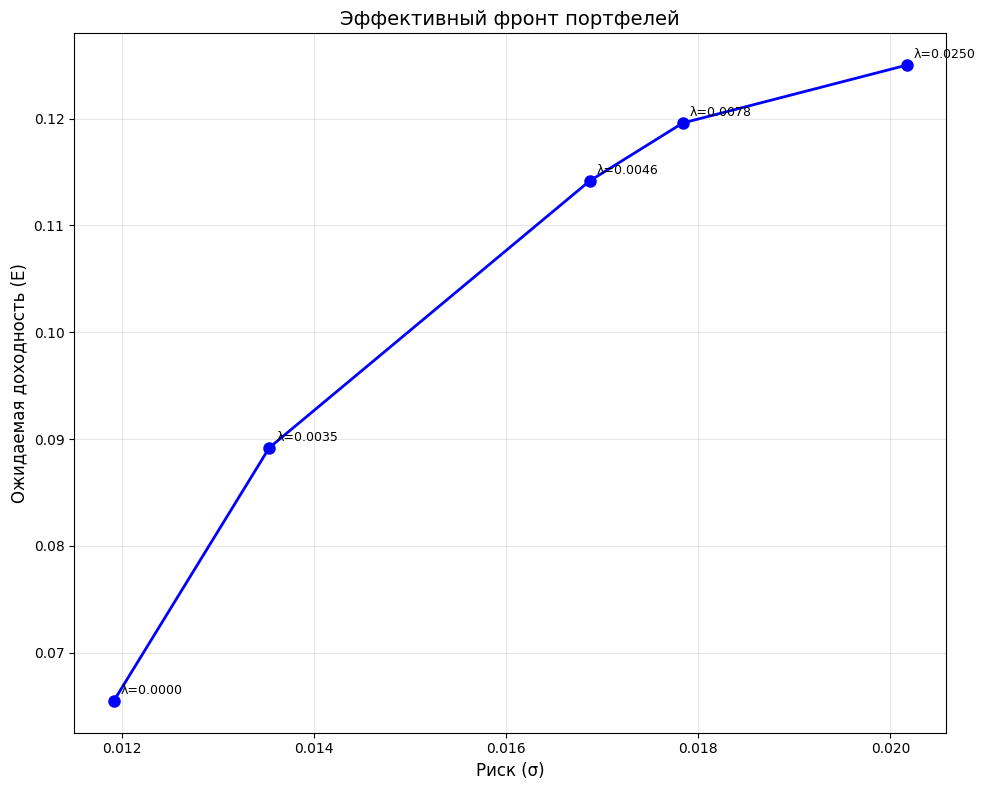

In [5]:
# Данные из таблицы 10.4
sigma_values = np.array([0.011913, 0.013532, 0.016868, 0.017838, 0.020171])
E_values = np.array([0.065490, 0.089186, 0.114156, 0.119581, 0.125000])

# Построение эффективного фронта
plt.figure(figsize=(10, 8))
plt.plot(sigma_values, E_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Риск (σ)', fontsize=12)
plt.ylabel('Ожидаемая доходность (E)', fontsize=12)
plt.title('Эффективный фронт портфелей', fontsize=14)
plt.grid(True, alpha=0.3)

# Подписи точек
for i, (sigma, E) in enumerate(zip(sigma_values, E_values)):
    plt.annotate(f'λ={lambdas[i]:.4f}', (sigma, E), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()